In [619]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics.cluster import pair_confusion_matrix
from sklearn.preprocessing import scale
from clustergram import Clustergram

Load data

In [620]:
# Load dataset
df = pd.read_csv('./south+german+credit+update/SouthGermanCredit.asc', delimiter=' ')

# Get info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   laufkont  1000 non-null   int64
 1   laufzeit  1000 non-null   int64
 2   moral     1000 non-null   int64
 3   verw      1000 non-null   int64
 4   hoehe     1000 non-null   int64
 5   sparkont  1000 non-null   int64
 6   beszeit   1000 non-null   int64
 7   rate      1000 non-null   int64
 8   famges    1000 non-null   int64
 9   buerge    1000 non-null   int64
 10  wohnzeit  1000 non-null   int64
 11  verm      1000 non-null   int64
 12  alter     1000 non-null   int64
 13  weitkred  1000 non-null   int64
 14  wohn      1000 non-null   int64
 15  bishkred  1000 non-null   int64
 16  beruf     1000 non-null   int64
 17  pers      1000 non-null   int64
 18  telef     1000 non-null   int64
 19  gastarb   1000 non-null   int64
 20  kredit    1000 non-null   int64
dtypes: int64(21)
memory usage: 164.2 KB


In [621]:
# Get visual info of data set
df.head()

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


In [622]:
# Dealing with missing values
df.isna().sum()

laufkont    0
laufzeit    0
moral       0
verw        0
hoehe       0
sparkont    0
beszeit     0
rate        0
famges      0
buerge      0
wohnzeit    0
verm        0
alter       0
weitkred    0
wohn        0
bishkred    0
beruf       0
pers        0
telef       0
gastarb     0
kredit      0
dtype: int64

Prepare data

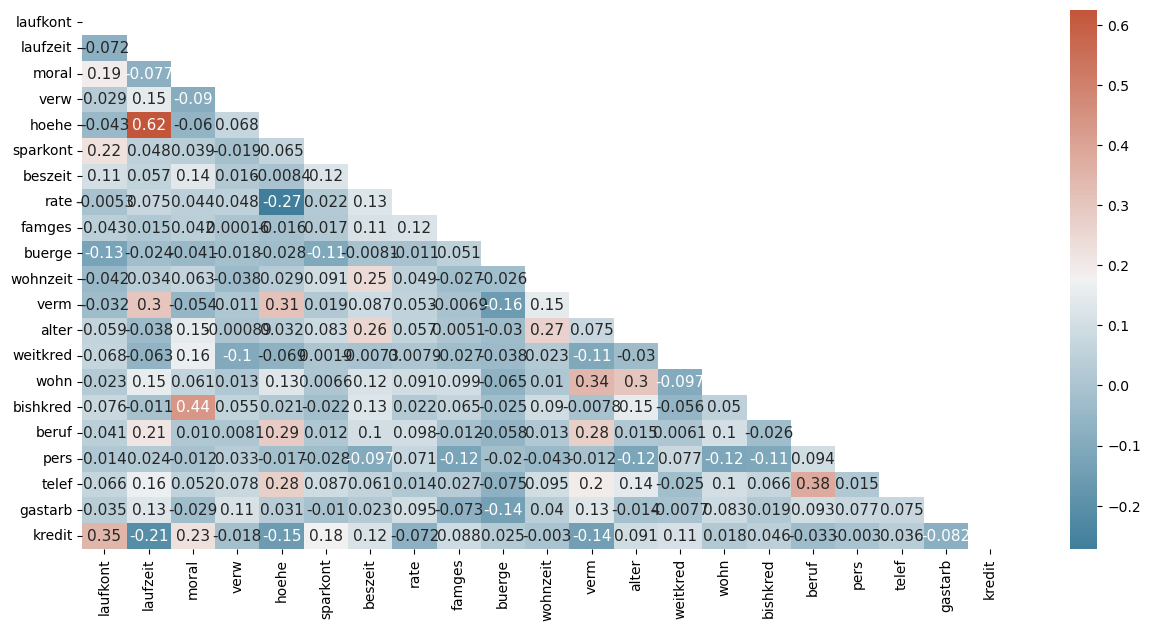

In [623]:
# Build correlation matrix again with new features
corr_matrix = df.corr()

# Set plot sixe 
plt.figure(figsize=(15, 7))

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
    
# Visualize correlation matrix
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, annot=True, annot_kws={"fontsize":11})

# Show plot
plt.show()

The dataset has no correlation. Everything is fine

Split the data

In [624]:
# Split input variables and output variables
X = df.drop(["kredit"], axis=1)
y = df["kredit"]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y) 

In [625]:
# Create Scaler
scale_standard = StandardScaler()

# Feature Scaling
X_train = scale_standard.fit_transform(X_train)
X_test = scale_standard.fit_transform(X_test)

kMeans model

In [626]:
# Metics analysis
silhouette_scores = []  
davies_bouldin_scores = []
distortions = []

# Cluster's range
k_values = range(2, 11)  

# Create kMeans model and calculate the best cluster number
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    ss = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append (ss)
    dbs = davies_bouldin_score(X, kmeans.labels_)
    davies_bouldin_scores.append (dbs)
    distortions.append(kmeans.inertia_)
    print(kmeans.inertia_, ss, dbs)
    print(pair_confusion_matrix(y, kmeans.labels_))

2405531148.1461473 0.7216367721912854 0.49940892697037703
[[133616 286384]
 [155134 423866]]
1278248235.961515 0.6475684539923428 0.5169820505824744
[[193754 226246]
 [227492 351508]]
650053206.3951819 0.6122202096519038 0.4909427140611887
[[260936 159064]
 [342492 236508]]
478480353.9630239 0.5658259408217358 0.5142689408044786
[[300478 119522]
 [397496 181504]]
318948286.74911904 0.5762843780492529 0.5257712752260569
[[315496 104504]
 [422162 156838]]
232736912.62811705 0.5776551021000933 0.5067140023499375
[[319656 100344]
 [428424 150576]]
182953235.6907825 0.5583125304545613 0.5193072099785356
[[334524  85476]
 [449316 129684]]
152688405.3090941 0.5078101916802876 0.541638768579596
[[351956  68044]
 [476854 102146]]
119045530.16897848 0.5170738036373727 0.5141320433627834
[[353910  66090]
 [478866 100134]]


Metric values show us that best number of cluster is 4  

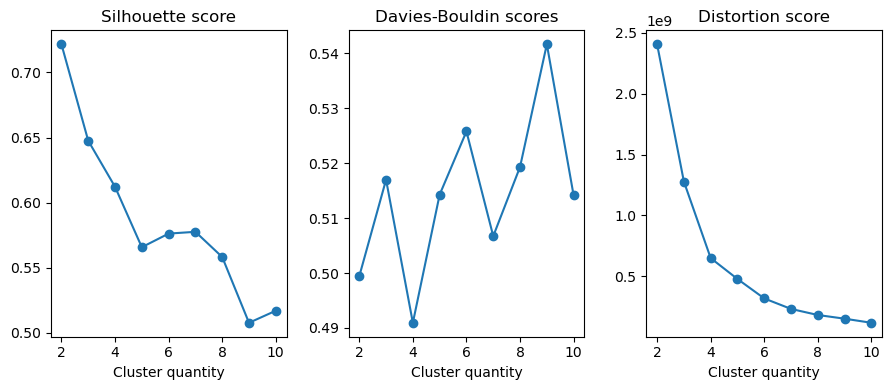

In [627]:
# Visualize
# Silhouette Method Plot
plt.figure(figsize=(12, 4))
plt.subplot(1, 4, 1)
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Cluster quantity')
plt.title('Silhouette score')

# Plot the Davies-Bouldin scores
plt.subplot(1, 4, 2)
plt.plot(k_values, davies_bouldin_scores, marker='o')
plt.xlabel('Cluster quantity')
plt.title('Davies-Bouldin scores')

# Plot the distortions
plt.subplot(1, 4, 3)
plt.plot(k_values, distortions, marker='o')
plt.xlabel('Cluster quantity')
plt.title('Distortion score')

plt.tight_layout()
plt.show()

The plots confirm this.

Agglomerative Clustering model

In [628]:
# Metics analysis
silhouette_scores = []  
davies_bouldin_scores = []
calinski_harabasz_scores = []

# Create Agglomerative Clustering model and calculate the best cluster number
for i in k_values:
    kmeans = AgglomerativeClustering(n_clusters=i).fit(X)
    ss = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append (ss)
    dbs = davies_bouldin_score(X, kmeans.labels_)
    davies_bouldin_scores.append (dbs)
    chs = calinski_harabasz_score(X, kmeans.labels_)
    calinski_harabasz_scores.append (chs)
    print(ss, dbs, chs)
    print(pair_confusion_matrix(y, kmeans.labels_))

0.6963201220299658 0.5369158957068757 2125.640593725942
[[158080 261920]
 [186238 392762]]
0.6637250807854153 0.498902067351529 2530.2716235915586
[[167590 252410]
 [195208 383792]]
0.5437601820998759 0.5407829811289366 3034.98540114863
[[286148 133852]
 [378086 200914]]
0.5404850283531741 0.5045994853598186 3124.2334935263025
[[286702 133298]
 [378650 200350]]
0.5252009879523082 0.5190111213974571 3556.4228145704433
[[292722 127278]
 [385318 193682]]
0.5483773516392867 0.5086543317868315 4838.220421729488
[[320904  99096]
 [429376 149624]]
0.5517607370582711 0.49657529609997686 5183.496806823152
[[321366  98634]
 [429754 149246]]
0.545207056520776 0.4904593065144706 5707.394757321317
[[337892  82108]
 [456904 122096]]
0.5602668061978584 0.48065250792591413 6785.55478101661
[[340260  79740]
 [459912 119088]]


For Agglomerative Clustering model result is the same. 4 numbers of cluster is the best result.

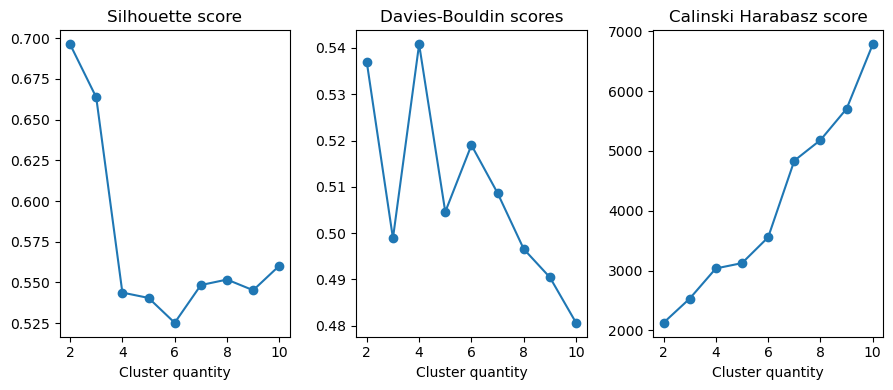

In [629]:
# Visualize
# Silhouette Method Plot
plt.figure(figsize=(12, 4))
plt.subplot(1, 4, 1)
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Cluster quantity')
plt.title('Silhouette score')

# Plot the Davies-Bouldin scores
plt.subplot(1, 4, 2)
plt.plot(k_values, davies_bouldin_scores, marker='o')
plt.xlabel('Cluster quantity')
plt.title('Davies-Bouldin scores')

# Plot the distortions
plt.subplot(1, 4, 3)
plt.plot(k_values, calinski_harabasz_scores, marker='o')
plt.xlabel('Cluster quantity')
plt.title('Calinski Harabasz score')

plt.tight_layout()
plt.show()

K=1 skipped. Mean computed from data directly.
K=2 fitted in 0.007 seconds.
K=3 fitted in 0.004 seconds.
K=4 fitted in 0.002 seconds.
K=5 fitted in 0.003 seconds.
K=6 fitted in 0.004 seconds.
K=7 fitted in 0.003 seconds.


<Axes: xlabel='Number of clusters (k)', ylabel='PCA weighted mean of the clusters'>

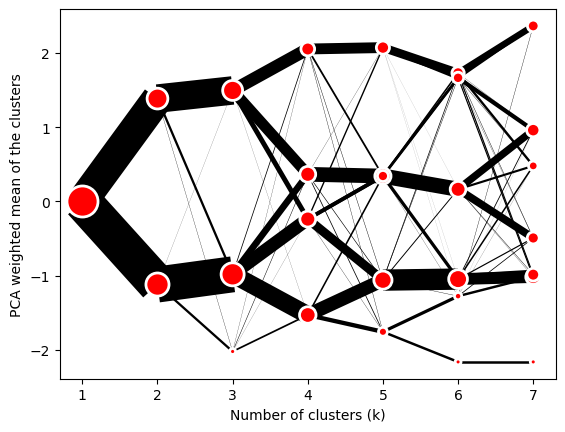

In [630]:
# Plot Clustergram 
df = scale(X)
cgram = Clustergram(range(1, 8))
cgram.fit(df)
cgram.plot()

The Clustergram confirms as well that 4 cluster is the best number.